# Canny边缘检测

### 目标
在本章中，我们将学习
- Canny边缘检测的概念
- OpenCV函数: **cv.Canny()**

### 理论

Canny Edge Detection是一种流行的边缘检测算法。它由John F. Canny发明

1. 这是一个多阶段算法，我们将经历每个阶段。


2. **降噪**

   由于边缘检测容易受到图像中噪声的影响，因此第一步是使用5x5高斯滤波器消除图像中的噪声。我们已经在前面的章节中看到了这一点。

3. **查找图像的强度梯度**

   然后使用Sobel核在水平和垂直方向上对平滑的图像进行滤波，以在水平方向(Gx)和垂直方向(Gy)上获得一阶导数。从这两张图片中，我们可以找到每个像素的边缘渐变和方向，如下所示：

    $$
    Edge\_Gradient \; (G) = \sqrt{G_x^2 + G_y^2} \\ Angle \; (\theta) = \tan^{-1} \bigg(\frac{G_y}{G_x}\bigg)
    $$
   
   渐变方向始终垂直于边缘。将其舍入为代表垂直，水平和两个对角线方向的四个角度之一。

4. **非极大值抑制**
    在获得梯度大小和方向后，将对图像进行全面扫描，以去除可能不构成边缘的所有不需要的像素。为此，在每个像素处，检查像素是否是其在梯度方向上附近的局部最大值。查看下面的图片：

    ![](data/nms.jpg)

    点A在边缘（垂直方向）上。渐变方向垂直于边缘。点B和C在梯度方向上。因此，将A点与B点和C点进行检查，看是否形成局部最大值。如果是这样，则考虑将其用于下一阶段，否则将其抑制（置为零）。
    简而言之，你得到的结果是带有“细边”的二进制图像。

5. **磁滞阈值**

   该阶段确定哪些边缘全部是真正的边缘，哪些不是。为此，我们需要两个阈值`minVal`和`maxVal`。强度梯度大于`maxVal`的任何边缘必定是边缘，而小于`minVal`的那些边缘必定是非边缘，因此将其丢弃。介于这两个阈值之间的对象根据其连通性被分类为边缘或非边缘。如果将它们连接到“边缘”像素，则将它们视为边缘的一部分。否则，它们也将被丢弃。见下图：

    ![](data/hysteresis.jpg)
   
   边缘A在`maxVal`之上，因此被视为“确定边缘”。尽管边C低于`maxVal`，但它连接到边A，因此也被视为有效边，我们得到了完整的曲线。但是边缘B尽管在`minVal`之上并且与边缘C处于同一区域，但是它没有连接到任何“确保边缘”，因此被丢弃。因此，非常重要的一点是我们必须相应地选择`minVal`和`maxVal`以获得正确的结果。

    在边缘为长线的假设下，该阶段还消除了小像素噪声。
 
    因此，我们最终得到的是图像中的强边缘。

### OpenCV中的Canny Edge检测

OpenCV将以上所有内容放在单个函数**cv.Canny**()中。我们将看到如何使用它。第一个参数是我们的输入图像。第二个和第三个参数分别是我们的`minVal`和`maxVal`。第三个参数是`perture_size`。它是用于查找图像渐变的Sobel内核的大小。默认情况下为3。最后一个参数是L2gradient，它指定用于查找梯度幅度的方程式。如果为`True`，则使用上面提到的更精确的公式，否则使用以下函数：$Edge\_Gradient \; (G) = |G_x| + |G_y|$。默认情况下，它为`False`。

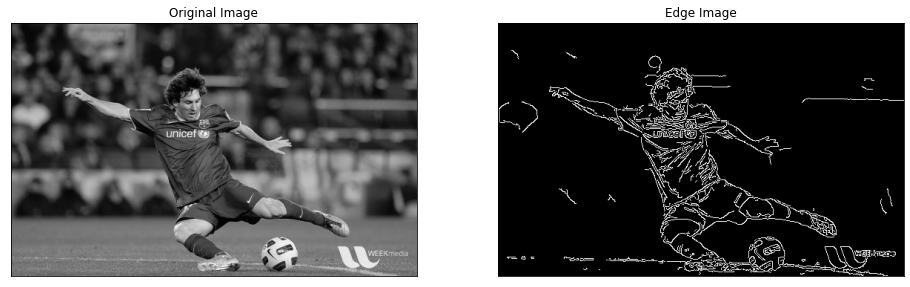

In [2]:
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('data/messi5.jpg',0)

edges = cv.Canny(img,100,200)

plt.figure(figsize=(16, 8))

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

### 附加资源

1. Canny edge detector at Wikipedia：http://en.wikipedia.org/wiki/Canny_edge_detector
2. Canny Edge Detection Tutorial：http://dasl.unlv.edu/daslDrexel/alumni/bGreen/www.pages.drexel.edu/_weg22/can_tut.html by Bill Green, 2002.

### 练习

1. 编写一个小应用程序以找到Canny边缘检测，该检测的阈值可以使用两个跟踪栏进行更改。这样，你可以了解阈值的影响。